In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 800)

sns.set()

In [3]:
churn_data = pd.read_csv('Datasets/Churn_Modelling.csv', index_col='RowNumber')
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
num_col = churn_data.select_dtypes(include=np.number).columns
cat_col = churn_data.select_dtypes(exclude=np.number).columns
print(f'Numerical Col: {num_col}')
print(f'Categorical Col: {cat_col}')

Numerical Col: Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Categorical Col: Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [8]:
# Dropping Features
churn_data.drop(['CustomerId','Surname'], axis=1, inplace=True)

In [9]:
# Geography Get Dummies
Geography_dummies = pd.get_dummies(prefix='Geo', data=churn_data, columns = ['Geography'])

In [10]:
# Gender Dummies
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1, 'Male': 0}})

In [11]:
churn_data_encoded = Gender_dummies
churn_data_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


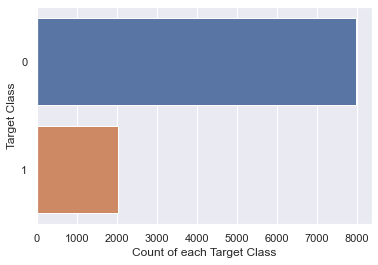

In [12]:
# Check of Imbalance Dataset
sns.countplot(y = 'Exited', data=churn_data_encoded)
plt.xlabel("Count of each Target Class")
plt.ylabel("Target Class")
plt.show()

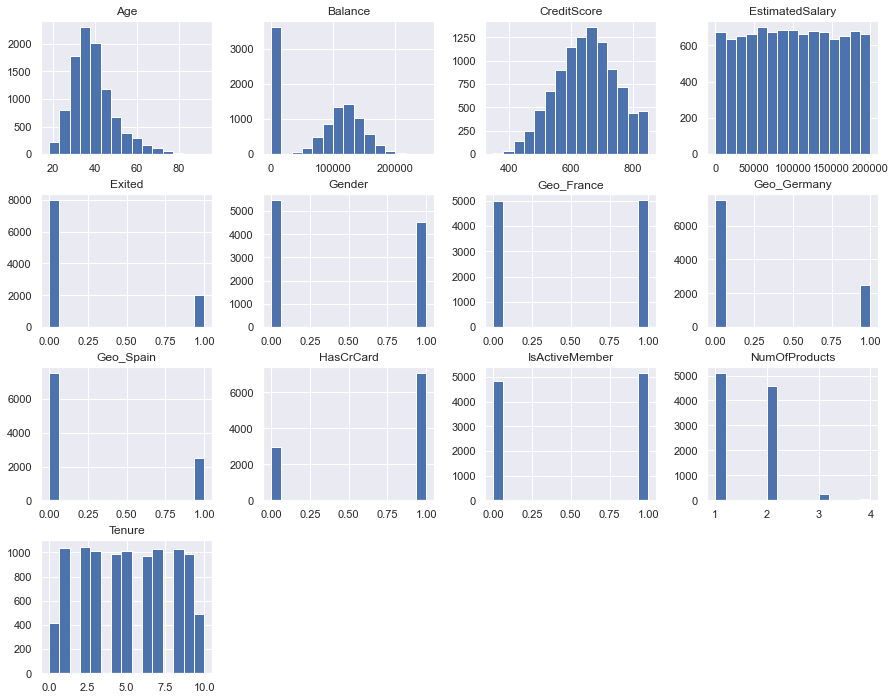

In [13]:
churn_data_encoded.hist(figsize=(15,12), bins=15)
plt.title("Feature Distribution")
plt.show()

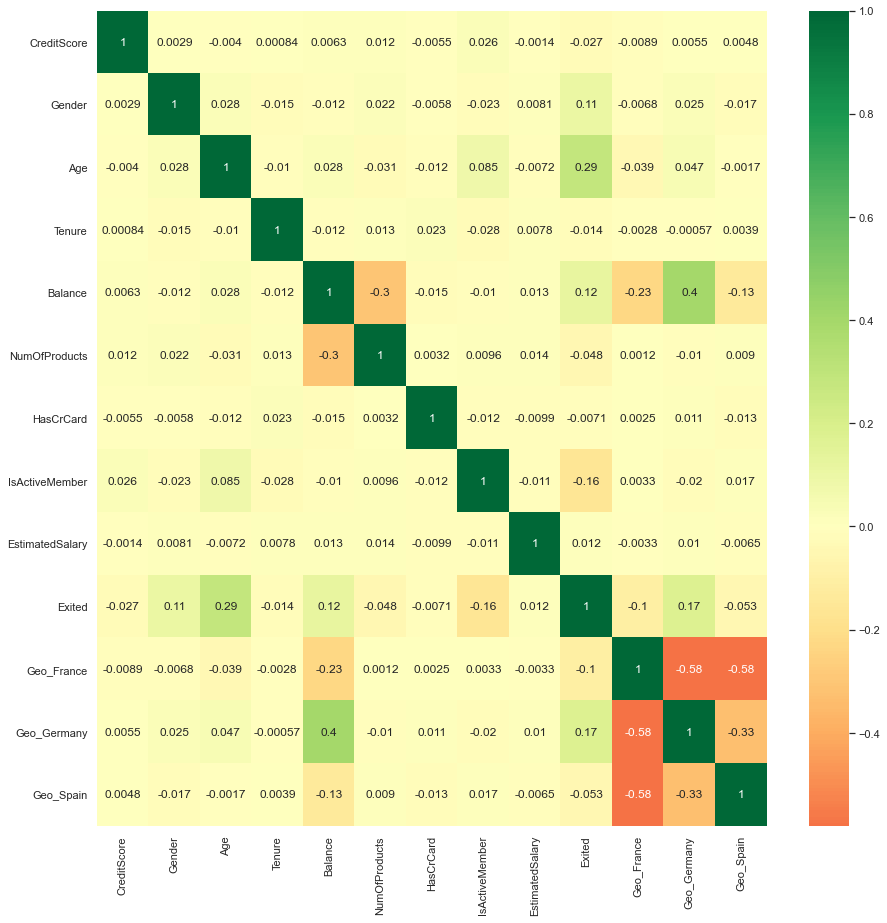

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(churn_data_encoded.corr(), annot=True, cmap='RdYlGn', center=0);

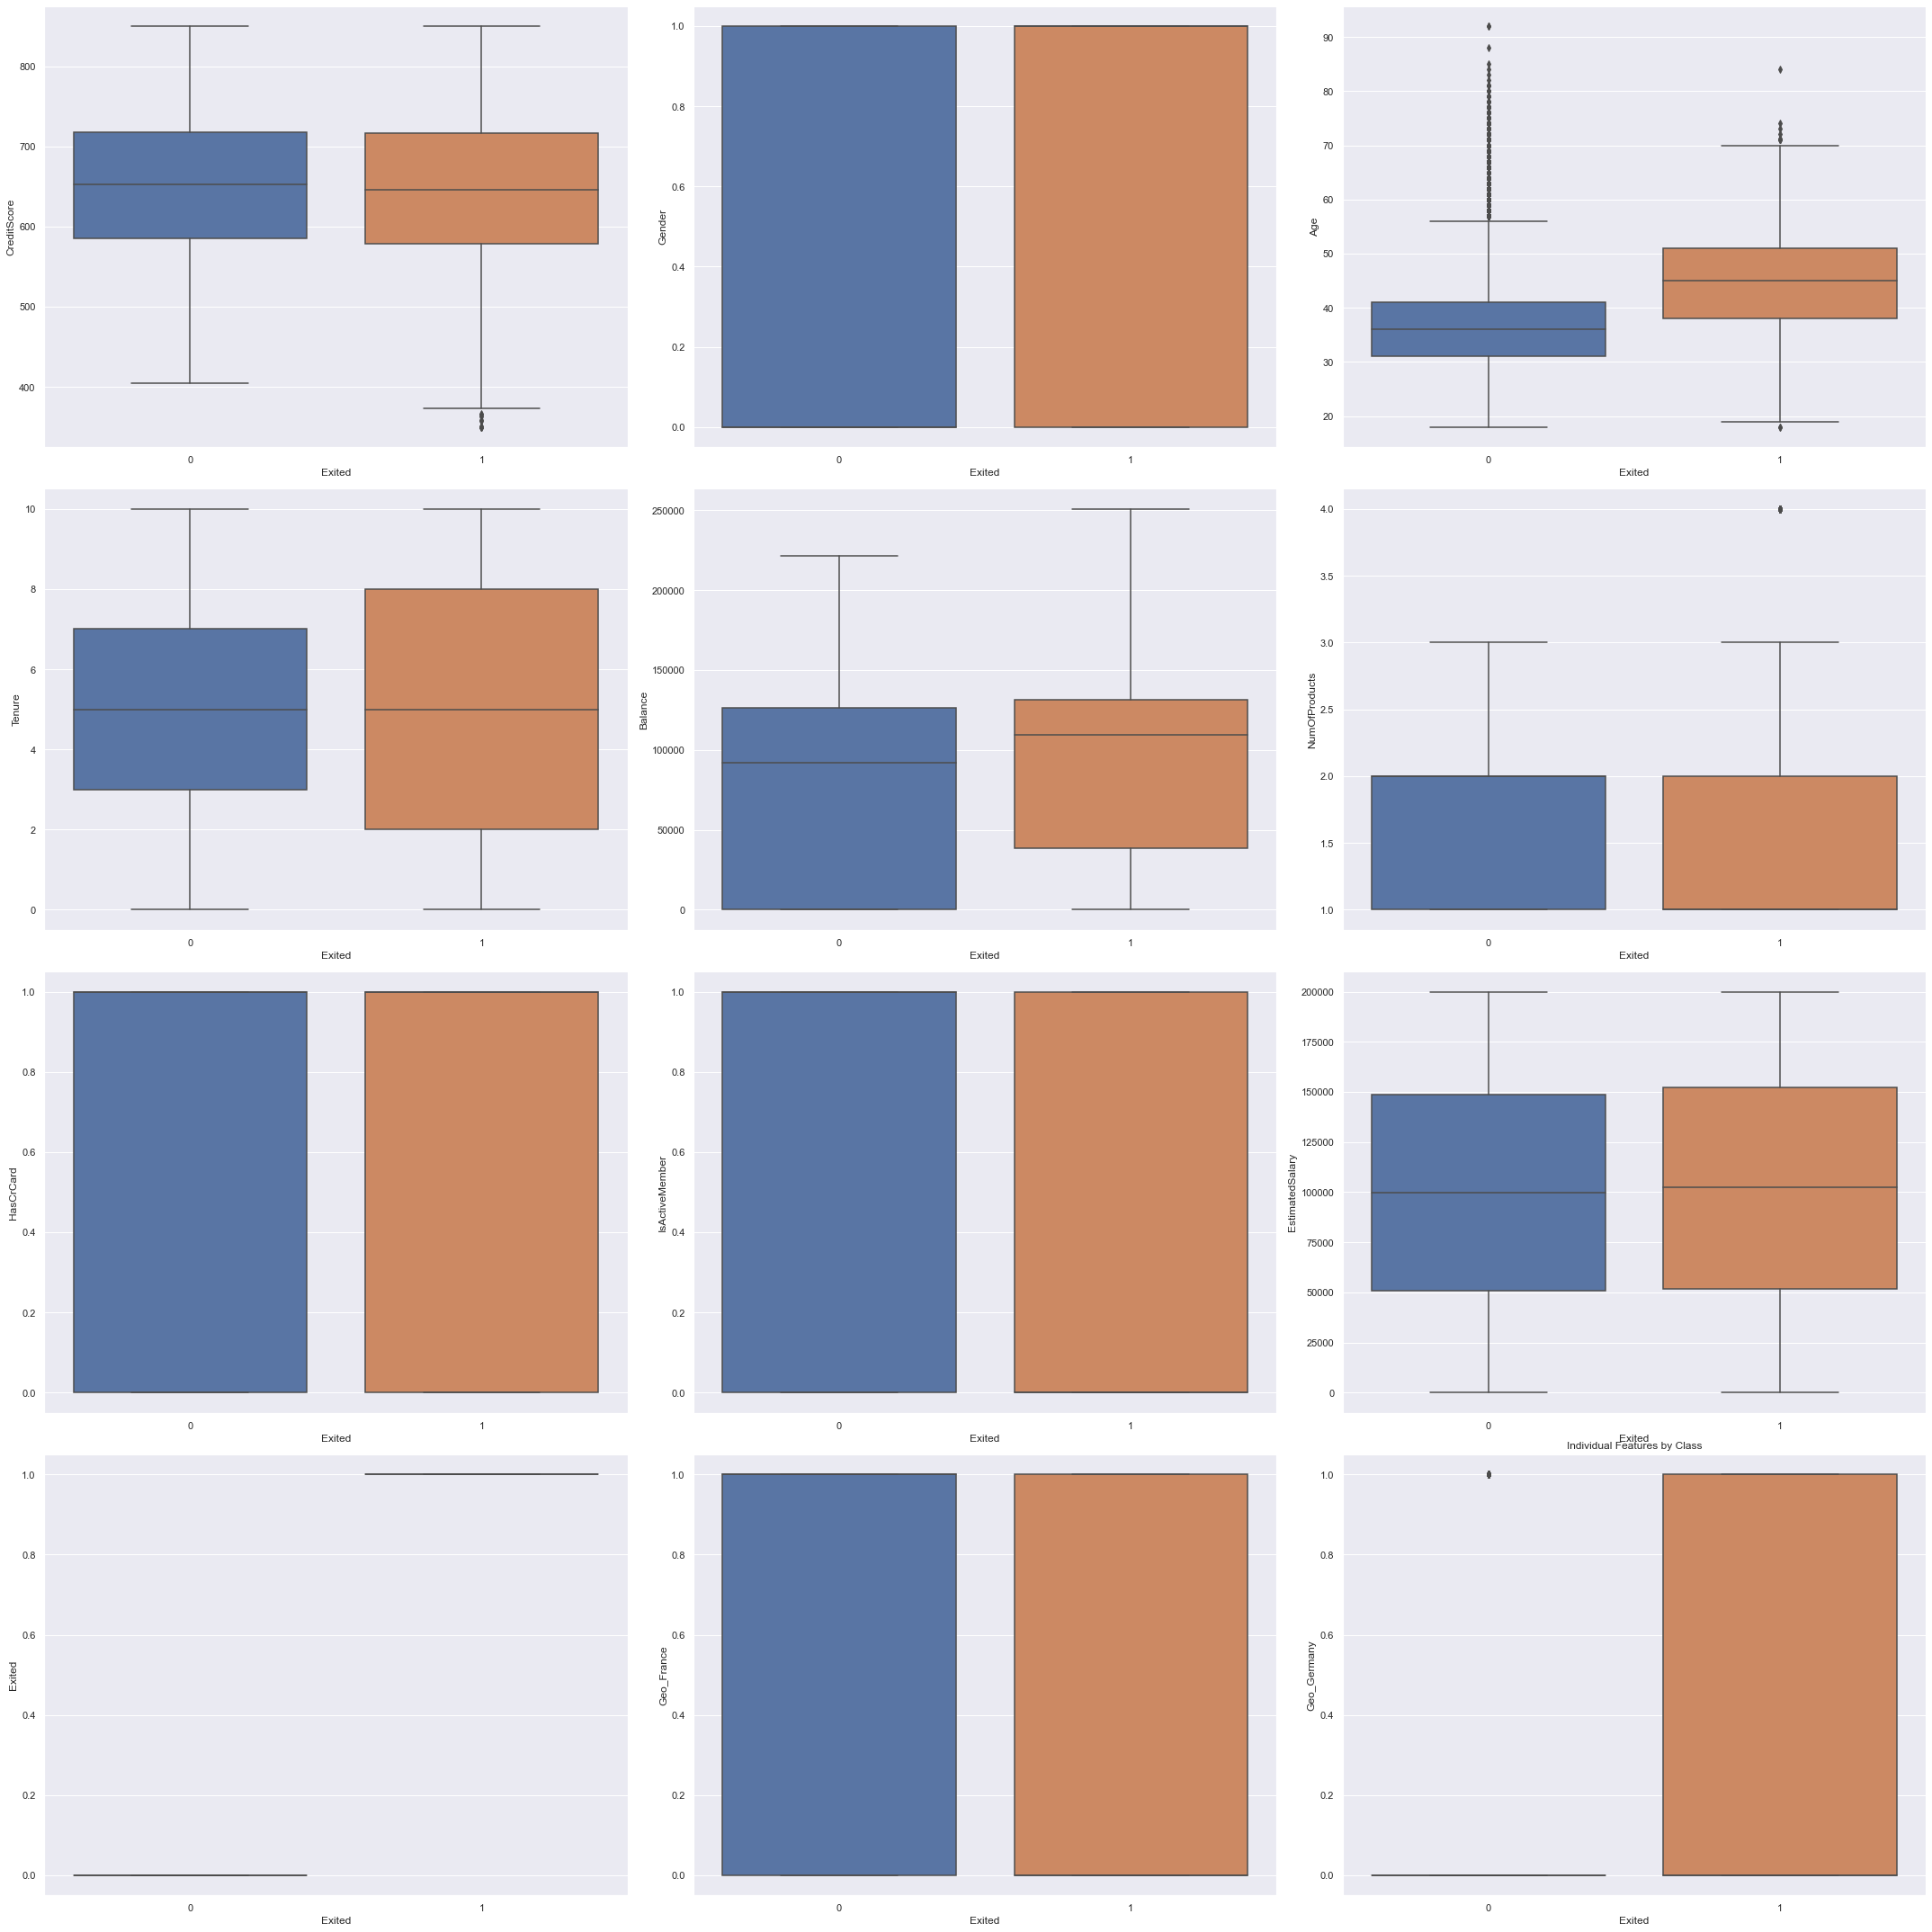

In [16]:
# Check the Distribution of y variable corresponding to x variables
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(30, 30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns)-1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x=churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]], ax=axes)
    col += 1
plt.tight_layout()    
plt.title("Individual Features by Class")
plt.show()

In [17]:
X = churn_data_encoded.drop(['Exited'], axis=1)
y = churn_data_encoded['Exited']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
# Defining the Model
lr = LogisticRegression()

# Training the Model
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred0 = lr.predict(X_test)

lr_probs = lr.predict_proba(X_test)

y_pred0

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [24]:
score_lr = lr.score(X_test, y_test)
print(f'{score_lr*100:0.2f}%')

81.30%


In [28]:
# Confusion Matrix
actual = y_test
predicted = y_pred0

results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
tp, fn, fp, tn = results.ravel()
print(f"True Positive : {tp}")
print(f"True Negative : {tn}")
print(f"False Positive : {fp}")
print(f"False Negative : {fn}")

Confusion Matrix :
[[2302   95]
 [ 466  137]]
True Positive : 2302
True Negative : 137
False Positive : 466
False Negative : 95


In [29]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2397
           1       0.59      0.23      0.33       603

    accuracy                           0.81      3000
   macro avg       0.71      0.59      0.61      3000
weighted avg       0.78      0.81      0.78      3000



In [30]:
from imblearn.over_sampling import RandomOverSampler

X = churn_data_encoded.drop(['Exited'], axis=1)
y = churn_data_encoded.Exited

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

y_ros.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [35]:
def classification_model(X, y, class_weight = None):
    
    # Splitting the Dataset into Training and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2020)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Defining the model
    lr = LogisticRegression(class_weight=class_weight)
    
    # Training the model
    lr.fit(X_train, y_train)
    
    # Predicting Target Values by Using X_test
    y_pred0 = lr.predict(X_test)
    lr_probs = lr.predict_proba(X_test)
    
    results = confusion_matrix(y_test, y_pred0)
    
    print('Confusion Matrix :')
    print(results)
    print('Accuracy Score :', accuracy_score(y_test, y_pred0))
    print('Report :')
    print(classification_report(y_test, y_pred0))

In [36]:
classification_model(X_ros, y_ros)

Confusion Matrix :
[[1710  666]
 [ 733 1669]]
Accuracy Score : 0.7071996651318543
Report :
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2376
           1       0.71      0.69      0.70      2402

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778



In [40]:
def compute_class_freqs(labels):
    """
    Compute positive and negative frequences for each class.

    Args:
        labels (np.array): matrix of labels, size (num_examples, num_classes)
    Returns:
        positive_frequencies (np.array): array of positive frequences for each
                                         class, size (num_classes)
        negative_frequencies (np.array): array of negative frequences for each
                                         class, size (num_classes)
    """
    # Total number of patients (rows)
    N = labels.shape[0]
    
    positive_frequencies = np.sum(labels, axis=0) / N
    negative_frequencies = 1 - positive_frequencies
    
    return positive_frequencies, negative_frequencies

In [37]:
X = churn_data_encoded.drop(['Exited'], axis=1)
y = churn_data_encoded['Exited']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [41]:
# Computing class frequencies for our training set
freq_pos, freq_neg = compute_class_freqs(y_train)
pos_weights = freq_neg
neg_weights = freq_pos
class_weights = {0: neg_weights, 1:pos_weights}
class_weights

{0: 0.20485714285714285, 1: 0.7951428571428572}

In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
lr = LogisticRegression(class_weight=class_weights)
    
# Training the model
lr.fit(X_train, y_train)

# Predicting Target Values by Using X_test
y_pred0 = lr.predict(X_test)
lr_probs = lr.predict_proba(X_test)

results = confusion_matrix(y_test, y_pred0)

print('Confusion Matrix :')
print(results)
print('Accuracy Score :', accuracy_score(y_test, y_pred0))
print('Report :')
print(classification_report(y_test, y_pred0))

Confusion Matrix :
[[1702  695]
 [ 184  419]]
Accuracy Score : 0.707
Report :
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2397
           1       0.38      0.69      0.49       603

    accuracy                           0.71      3000
   macro avg       0.64      0.70      0.64      3000
weighted avg       0.80      0.71      0.73      3000

